In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
params = [
          #"mg.in", # LO-MSSM not agree
          #"sps1a1000_mod.in", # LO-MSSM not agree
          "param_card_nlo.dat", # LO-MSSM agree
          "mastercode_no_gm2_mod.in", # LO-MSSM agree
          #"mastercode_with_gm2.in", # LO-MSSM not agree
          #"VANILLA_param_card.dat", # does not work here for RS
          #"scenarioA.in", # crash MG missing mass 23 Z
          #"scenarioB.in", # crash MG missing mass 23 Z
          #"scenarioB_mod.in", # LO-MSSM not agree
         ]
#model_path="/opt/MG5_aMC_v2_7_0/models/EWKino_NLO_UFO_py3" # Agrees well at LO with all cases in mg.in, sps1a1000_mod.in but does not support NLO for some reason
model_path="/opt/MG5_aMC_v2_7_0/models/MSSMatNLO_UFO" # Works at NLO but not with charginos, LO cases only work with diagonal/none UMIX/VMIX/NMIX
mg.set_path("/opt/MG5_aMC_v2_7_0/")
print (mg.get_path())
rs.set_path("~/git/resummino_test")
print (rs.get_path())


/opt/MG5_aMC_v2_7_0/
~/git/resummino_test/


# NLO

In [4]:
params = [
          "mg.in",
          #"param_card_nlo.dat",
          #"sps1a1000_mod.in",
          #"mastercode_no_gm2_mod.in",
          "mastercode_with_gm2.in",
          #"VANILLA_param_card.dat", # does not work here for RS
         ]
ps = [
      # charginos
      (-1000004, 1000024), 
      (1000002, -1000037), 
      (1000003, 1000037), 
      (-1000001, -1000024),
     ]

## Mass

Running: 14 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskip

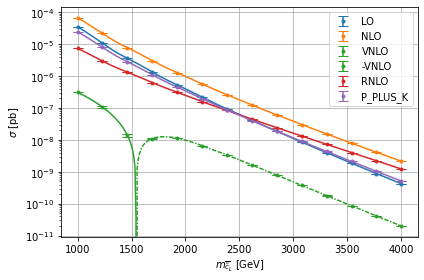

Running: 14 jobs


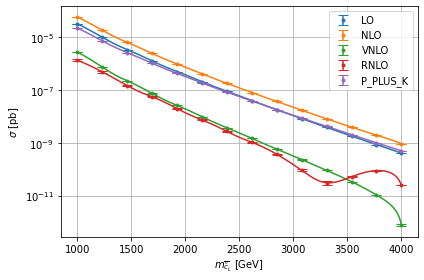

Running: 14 jobs


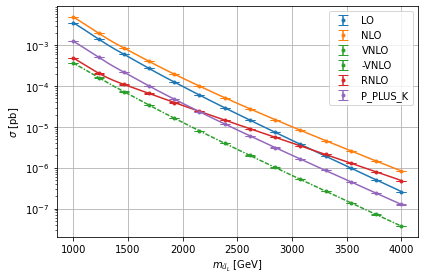

Running: 14 jobs


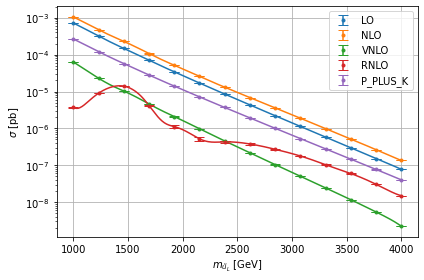

Running: 14 jobs


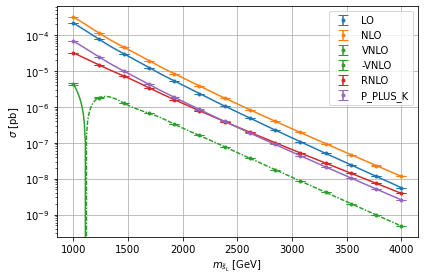

Running: 14 jobs


KeyboardInterrupt: 

In [5]:
for pa,pb in ps:
    for param in params:
        i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(1000,4000,14),diff_L_R=100)
        try:
            #mg_dl = mg.run(li,False)
            rs_dl = rs.run(li,False,False)
        except Exception as e:
            print(e)
            continue

        hepi.mass_plot(rs_dl,"LO",pa,logy=True)
        hepi.mass_plot(rs_dl,"NLO",pa,logy=True)
        hepi.mass_plot(rs_dl,"VNLO",pa,logy=True)
        hepi.mass_plot(rs_dl,"RNLO",pa,logy=True)
        hepi.mass_plot(rs_dl,"P_PLUS_K",pa,logy=True)
        #hepi.mass_plot(mg_dl,"NLO",pa,logy=True)
        smpl.plot.show()
        